In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the large dataset into a pandas dataframe hate_crime.csv
data = pd.read_csv('hate_crime.csv', encoding='latin1')
data

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,NaN,City,WY,Wyoming,Mountain,West,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,NaN,County,WY,Wyoming,Mountain,West,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


# Data Cleaning

In [3]:
# get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241663 entries, 0 to 241662
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   241663 non-null  int64  
 1   data_year                     241663 non-null  int64  
 2   ori                           241663 non-null  object 
 3   pug_agency_name               241663 non-null  object 
 4   pub_agency_unit               7189 non-null    object 
 5   agency_type_name              241663 non-null  object 
 6   state_abbr                    241663 non-null  object 
 7   state_name                    241663 non-null  object 
 8   division_name                 241663 non-null  object 
 9   region_name                   241663 non-null  object 
 10  population_group_code         241108 non-null  object 
 11  population_group_description  241108 non-null  object 
 12  incident_date                 241663 non-nul

In [4]:
# find the amount of missing values in each column
data.isnull().sum()

incident_id                          0
data_year                            0
ori                                  0
pug_agency_name                      0
pub_agency_unit                 234474
agency_type_name                     0
state_abbr                           0
state_name                           0
division_name                        0
region_name                          0
population_group_code              555
population_group_description       555
incident_date                        0
adult_victim_count              170538
juvenile_victim_count           172978
total_offender_count                 0
adult_offender_count            177148
juvenile_offender_count         177155
offender_race                        0
offender_ethnicity                   0
victim_count                         0
offense_name                         0
total_individual_victims          4859
location_name                        0
bias_desc                            0
victim_types             

## The following columns will be dropped:
1. pub_agency_unit - because it has 234474 missing values
2. adult_victim_count - because it has 170538 missing values
3. juvenile_victim_count - because it has 172978 missing values
4. adult_offender_count - because it has 177148 missing values
5. juvenile_offender_count - because it has 177155 missing values

In [5]:
# drop the columns with missing values
data = data.drop(['pub_agency_unit', 'adult_victim_count', 'juvenile_victim_count', 'adult_offender_count', 'juvenile_offender_count'], axis=1)
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


## The following records with missing values will be dropped:
1. population_group_code - because it has 555 missing values
2. population_group_description - because it has 555 missing values
3. total_individual_victims - because it has 4859 missing values

The records with missing values will be dropped because they are few compared to the total number of records in the dataset.

In [6]:
# drop the records with missing values
data = data.dropna()
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


## Dropping Offender Ethnicity 

The offender ethnicity column can be dropped because it mostly contains missing values and won't be used in the analysis.

In [7]:
# find the info for the offender_ethnicity column
data['offender_ethnicity'].value_counts()

offender_ethnicity
Not Specified             201698
Unknown                    17396
Not Hispanic or Latino     13174
Hispanic or Latino          3192
Multiple                     829
Name: count, dtype: int64

In [8]:
# drop the offender_ethnicity column
data = data.drop(['offender_ethnicity'], axis=1)
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,2,Black or African American,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,1,White,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,1,White,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,8,White,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


## Droppping More Columns

Furthermore, the Columns of:
- incident_id
- data_year
- ori
- pug_agency_name
- agency_type_name
- state_abbr
- division_name
- region_name* 
- population_group_code
- population_group_description

In [9]:
data = data.drop(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'agency_type_name', 'state_abbr', 'division_name', 'population_group_code', 'population_group_description'], axis=1)
data

,state_name,region_name,incident_date,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,Arkansas,South,1991-07-04,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,Arkansas,South,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,Arkansas,South,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,Arkansas,South,1991-10-06,2,Black or African American,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,Arkansas,South,1991-10-14,1,White,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,Wyoming,West,2022-06-01,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,Wyoming,West,2022-09-19,1,White,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,Wyoming,West,2022-11-08,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,Wyoming,West,2022-11-15,8,White,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236289 entries, 0 to 241662
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state_name                236289 non-null  object 
 1   region_name               236289 non-null  object 
 2   incident_date             236289 non-null  object 
 3   total_offender_count      236289 non-null  int64  
 4   offender_race             236289 non-null  object 
 5   victim_count              236289 non-null  int64  
 6   offense_name              236289 non-null  object 
 7   total_individual_victims  236289 non-null  float64
 8   location_name             236289 non-null  object 
 9   bias_desc                 236289 non-null  object 
 10  victim_types              236289 non-null  object 
 11  multiple_offense          236289 non-null  object 
 12  multiple_bias             236289 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage:

## Bias_desc Cleaning

There are over 300 unique values in the bias_desc column. The column consists of one or more categories separated by a comma or semicolon. The column will converted into a list of categories.

In [11]:
# output the info for the bias_desc column
data['bias_desc'].value_counts()

bias_desc
Anti-Black or African American                                               80210
Anti-Jewish                                                                  27792
Anti-White                                                                   27008
Anti-Gay (Male)                                                              23659
Anti-Hispanic or Latino                                                      15374
                                                                             ...  
Anti-Black or African American;Anti-Gay (Male);Anti-Islamic (Muslim)             1
Anti-Hindu;Anti-Islamic (Muslim);Anti-Other Race/Ethnicity/Ancestry              1
Anti-Gay (Male);Anti-Hispanic or Latino;Anti-Male                                1
Anti-Jewish;Anti-Mental Disability;Anti-White                                    1
Anti-American Indian or Alaska Native;Anti-Female;Anti-Hispanic or Latino        1
Name: count, Length: 345, dtype: int64

In [12]:
# remove the special characters from the bias_desc column
data['bias_desc'] = data['bias_desc'].str.replace('(', '')
data['bias_desc'] = data['bias_desc'].str.replace(')', '')

# convert the bias_desc column into a list of categories
data['bias_desc'] = data['bias_desc'].str.replace(';', ',').str.split(',')
data

,state_name,region_name,incident_date,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,Arkansas,South,1991-07-04,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,[Anti-Black or African American],Individual,S,S
1,Arkansas,South,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,[Anti-White],Individual,M,S
2,Arkansas,South,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,[Anti-White],Individual,M,S
3,Arkansas,South,1991-10-06,2,Black or African American,1,Intimidation,1.0,Residence/Home,[Anti-White],Individual,S,S
4,Arkansas,South,1991-10-14,1,White,1,Intimidation,1.0,School/College,[Anti-Black or African American],Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,Wyoming,West,2022-06-01,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,[Anti-White],Individual,S,S
241659,Wyoming,West,2022-09-19,1,White,1,Intimidation,1.0,School-College/University,[Anti-Gay Male],Individual,S,S
241660,Wyoming,West,2022-11-08,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,[Anti-Hispanic or Latino],Individual,S,S
241661,Wyoming,West,2022-11-15,8,White,1,Intimidation,1.0,Residence/Home,[Anti-Black or African American],Individual,S,S


In [13]:
# one hot encode the bias_desc column
def one_hot_encode(column):
    #transforms elements in lists to rows
    types = column.explode() 
    
    # returns the frequency of each type for each index
    oneHotEncode = pd.crosstab(types.index, types)
    
    return oneHotEncode

In [14]:
one_hot_bias_desc = one_hot_encode(data['bias_desc'])
one_hot_bias_desc

bias_desc,Bisexual,Gay,Greek,Group,Other,or Transgender Mixed Group,Anti-American Indian or Alaska Native,Anti-Arab,Anti-Asian,Anti-Atheism/Agnosticism,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From the one hot encoded dataframe of the bias_desc column we can see that there are 40 unique categories. The categories will be merged with the original dataset.

In [15]:
data = data.drop("bias_desc", axis=1)

In [16]:
# merge the one hot encoded bias_desc column with the original dataset
data = pd.concat([data, one_hot_bias_desc], axis=1)
data

,state_name,region_name,incident_date,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,victim_types,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
0,Arkansas,South,1991-07-04,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Individual,...,0,0,0,0,0,0,0,0,0,0
1,Arkansas,South,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Individual,...,0,0,0,0,0,0,0,0,0,1
2,Arkansas,South,1991-07-10,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Individual,...,0,0,0,0,0,0,0,0,0,1
3,Arkansas,South,1991-10-06,2,Black or African American,1,Intimidation,1.0,Residence/Home,Individual,...,0,0,0,0,0,0,0,0,0,1
4,Arkansas,South,1991-10-14,1,White,1,Intimidation,1.0,School/College,Individual,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,Wyoming,West,2022-06-01,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Individual,...,0,0,0,0,0,0,0,0,0,1
241659,Wyoming,West,2022-09-19,1,White,1,Intimidation,1.0,School-College/University,Individual,...,0,0,0,0,0,0,0,0,0,0
241660,Wyoming,West,2022-11-08,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Individual,...,0,0,0,0,0,0,0,0,0,0
241661,Wyoming,West,2022-11-15,8,White,1,Intimidation,1.0,Residence/Home,Individual,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# output the cleaned dataset to a csv file
data.to_csv('cleaned_hate_crime.csv', index=False)

In [18]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 236289 entries, 0 to 241662
Data columns (total 52 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   state_name                                      236289 non-null  object 
 1   region_name                                     236289 non-null  object 
 2   incident_date                                   236289 non-null  object 
 3   total_offender_count                            236289 non-null  int64  
 4   offender_race                                   236289 non-null  object 
 5   victim_count                                    236289 non-null  int64  
 6   offense_name                                    236289 non-null  object 
 7   total_individual_victims                        236289 non-null  float64
 8   location_name                                   236289 non-null  object 
 9   victim_types                   

### Summary Statistics

In [19]:
#storing data types that are object to a variable to perform a describe
text = data.dtypes[data.dtypes == "object"].index
text

Index(['state_name', 'region_name', 'incident_date', 'offender_race',
       'offense_name', 'location_name', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

In [20]:
data[text].describe()

,state_name,region_name,incident_date,offender_race,offense_name,location_name,victim_types,multiple_offense,multiple_bias
count,236289,236289,236289,236289,236289,236289,236289,236289,236289
unique,53,6,11688,8,393,149,55,2,2
top,California,West,2001-09-12,White,Intimidation,Residence/Home,Individual,S,S
freq,39024,73083,178,94377,70178,70570,190923,228120,234869


In [21]:
data.describe()

,total_offender_count,victim_count,total_individual_victims,Bisexual,Gay,Greek,Group,Other,or Transgender Mixed Group,Anti-American Indian or Alaska Native,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
count,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,...,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000
mean,0.962571,1.243685,0.986555,0.033552,0.033552,0.001574,0.029007,0.001574,0.033552,0.011494,...,0.005277,0.000719,0.001473,0.048318,0.015214,0.003538,0.005692,0.002505,0.006479,0.115240
std,1.325121,2.160650,1.065692,0.180074,0.180074,0.039647,0.168229,0.039647,0.180074,0.106594,...,0.072454,0.026813,0.038349,0.214438,0.122405,0.059376,0.075232,0.049991,0.080233,0.319312
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.000000,900.000000,147.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization


## Histogram and Density Plot of:
- Victim Count
- Total Offender Count
- Total Individual Victims

C:\Users\Shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

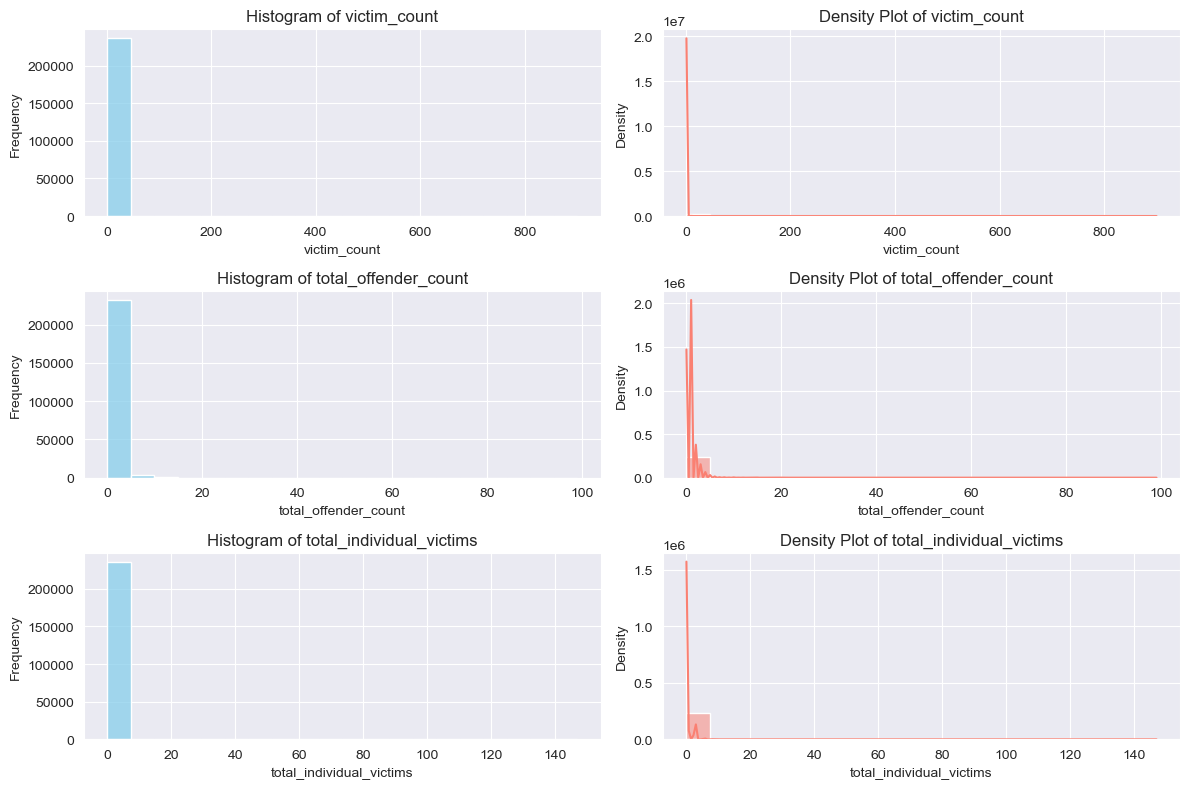

In [22]:
# Select numerical variables for visualization
numerical_vars = ['victim_count', 'total_offender_count', 'total_individual_victims']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(12, 8))

# Create histograms and density plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(data[var], ax=axes[i][0], kde=False, color='skyblue', bins=20)
    axes[i][0].set_title(f'Histogram of {var}')
    axes[i][0].set_xlabel(var)
    axes[i][0].set_ylabel('Frequency')

    # Density plot
    sns.histplot(data[var], ax=axes[i][1], kde=True, color='salmon', bins=20)
    axes[i][1].set_title(f'Density Plot of {var}')
    axes[i][1].set_xlabel(var)
    axes[i][1].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Bar and Pie Chart of Offender Race

C:\Users\Shane\AppData\Local\Temp\ipykernel_12296\4118618461.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(data['offender_race'].value_counts().index, percentages)], loc='center left', bbox_to_anchor=(1, 0.5))


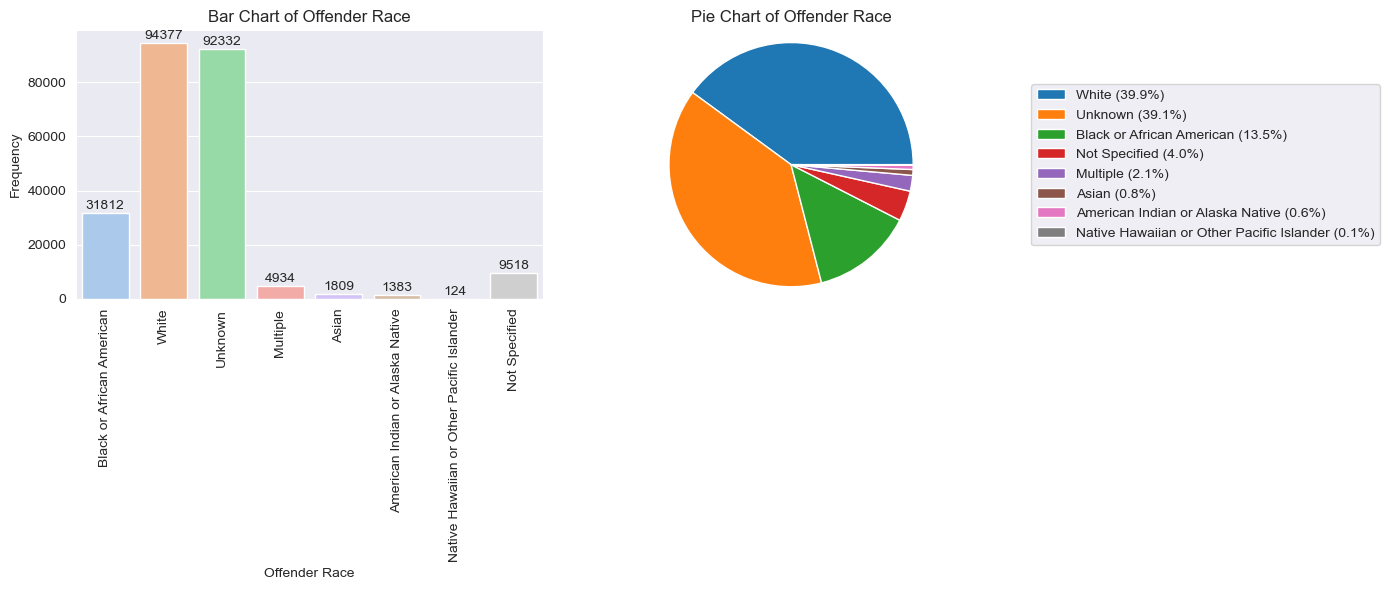

In [23]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the bar chart
plt.subplot(1, 2, 1)
ax = sns.countplot(x='offender_race', data=data, palette='pastel')
plt.title('Bar Chart of Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5),  # Adjust this value to control the distance from the bar
                textcoords = 'offset points')

# Plotting the pie chart for offender race
plt.subplot(1, 2, 2)
patches, _ = plt.pie(data['offender_race'].value_counts(), autopct=None)
plt.title('Pie Chart of Offender Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Calculate percentages
percentages = [(count / len(data)) * 100 for count in data['offender_race'].value_counts()]

# Create a legend for the pie chart with percentages
plt.legend(patches, labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(data['offender_race'].value_counts().index, percentages)], loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plots
plt.tight_layout()
plt.show()

## Bar Chart of Victim Types

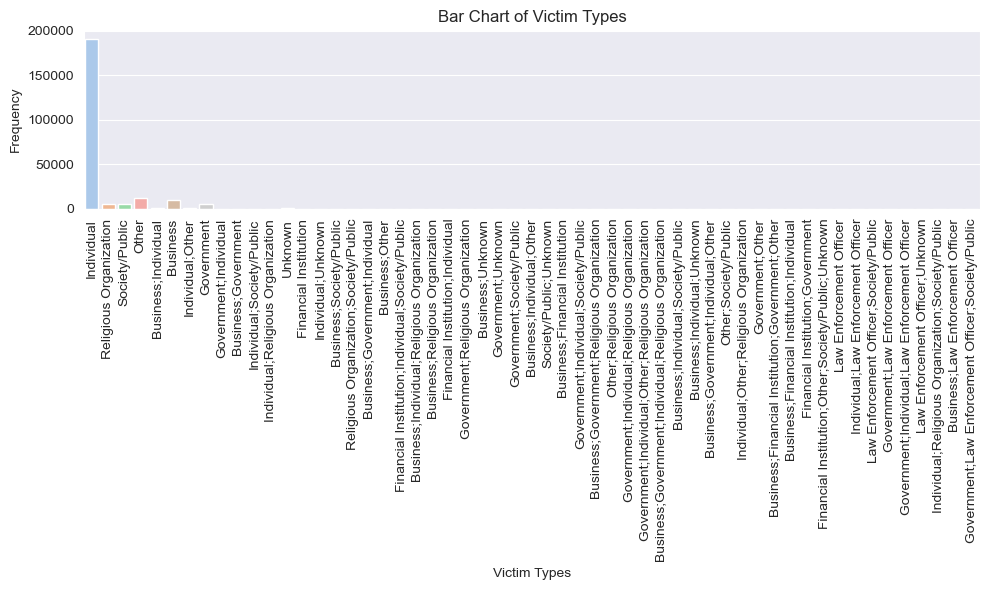

In [24]:
# Select the variable for visualization
victim_types = 'victim_types'

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a bar chart for victim types
sns.countplot(x=victim_types, data=data, palette='pastel')
plt.title('Bar Chart of Victim Types')
plt.xlabel('Victim Types')
plt.ylabel('Frequency')

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Bar and Pie Chart of Bias Category

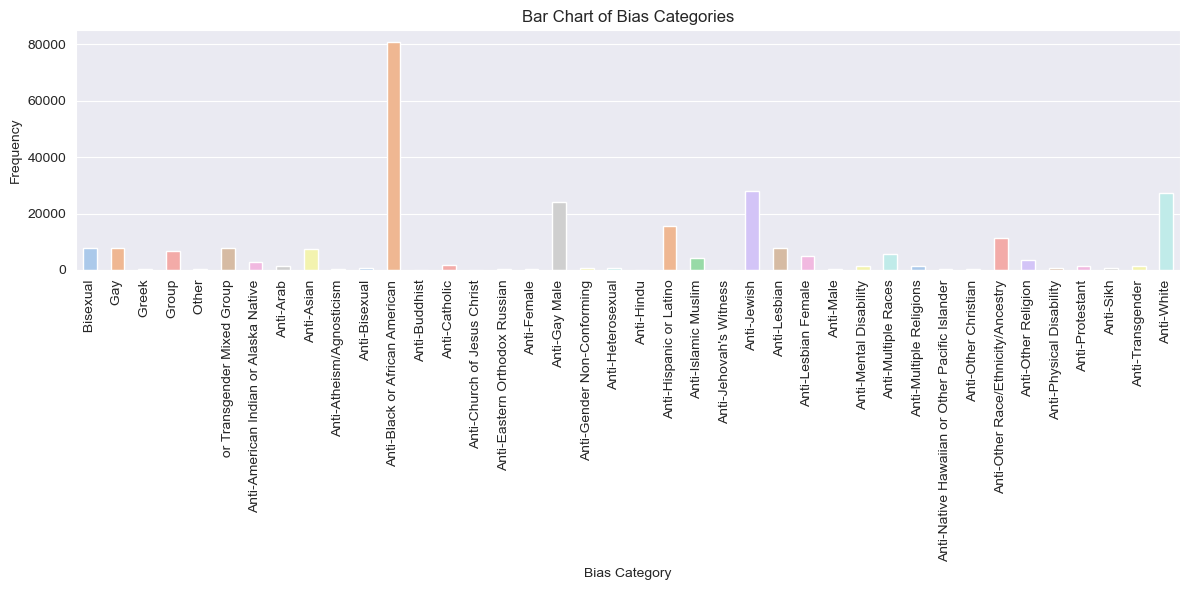

In [25]:
# Count the occurrences of each bias category
bias_counts = one_hot_bias_desc.sum()

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a bar chart for bias categories
ax = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel',  width=0.5)
plt.title('Bar Chart of Bias Categories')
plt.xlabel('Bias Category')
plt.ylabel('Frequency')



# Rotate x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Shane\AppData\Local\Temp\ipykernel_12296\3218699209.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax2.legend(patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))


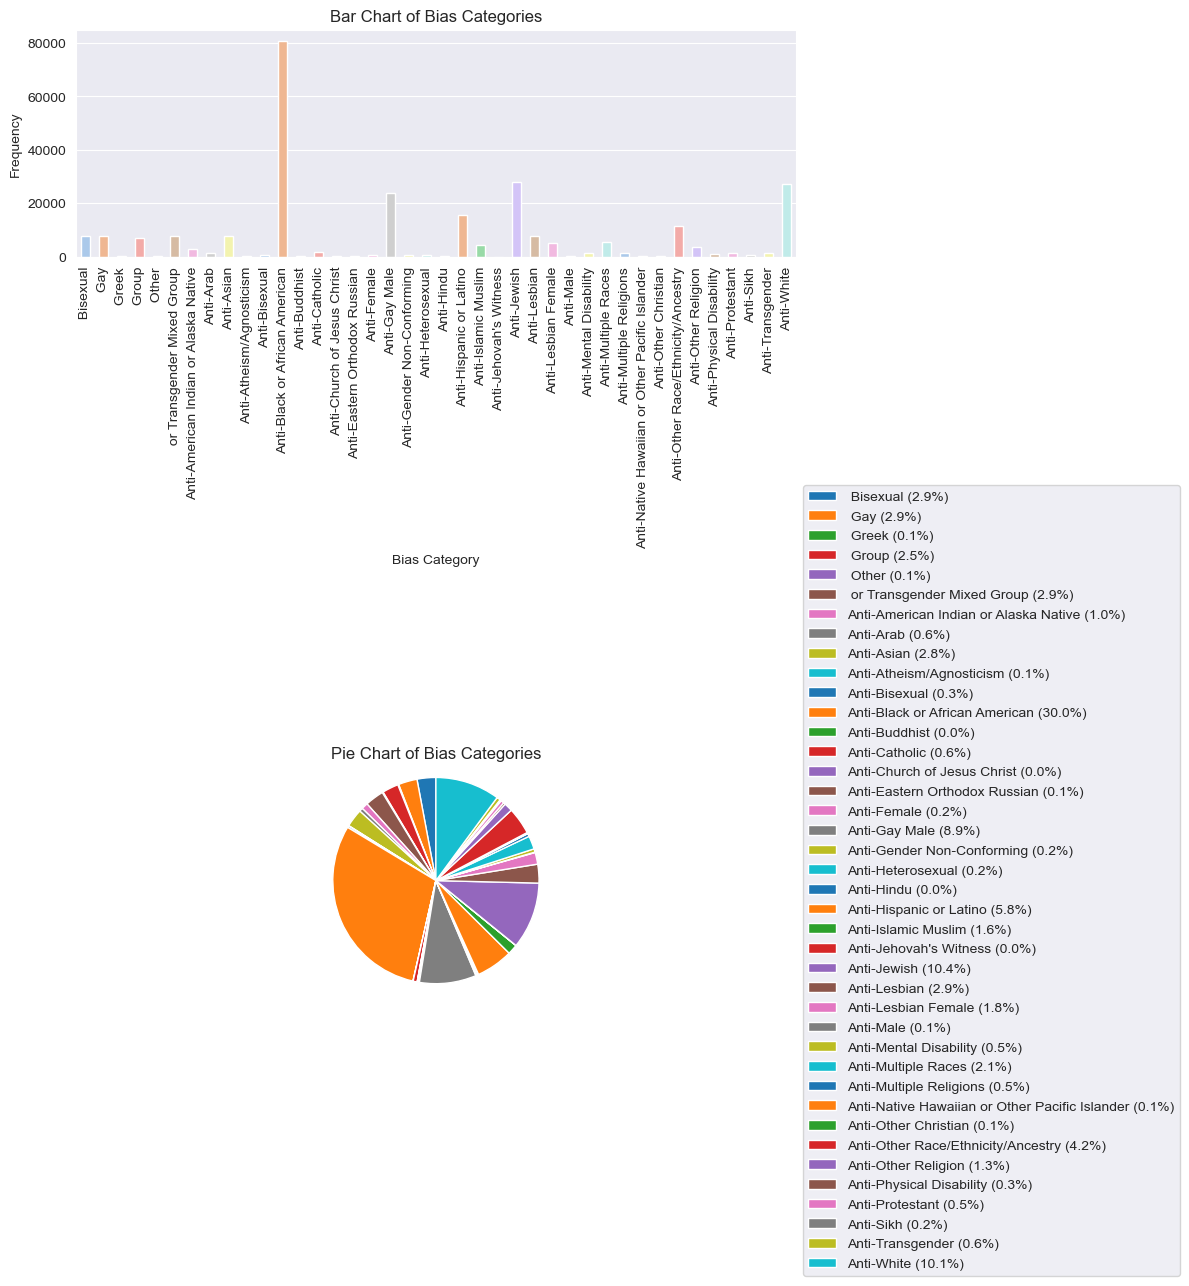

In [26]:
# Count the occurrences of each bias category
bias_counts = one_hot_bias_desc.sum()

# Calculate percentages
total = bias_counts.sum()
percentages = [(count / total) * 100 for count in bias_counts.values]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Create a bar chart for bias categories
ax1 = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel', ax=axs[0], width=0.5)
ax1.set_title('Bar Chart of Bias Categories')
ax1.set_xlabel('Bias Category')
ax1.set_ylabel('Frequency')

# Rotate x-axis labels at a 45-degree angle for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a pie chart for bias categories
ax2 = axs[1]
patches, texts, autotexts = ax2.pie(bias_counts.values, labels=bias_counts.index, autopct='%1.1f%%', startangle=90)

# Remove texts and percentages from the pie chart
for text in texts + autotexts:
    text.set_visible(False)

# Create a legend for the pie chart with percentages
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(bias_counts.index, percentages)]
ax2.legend(patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')

# Set the title for the pie chart
ax2.set_title('Pie Chart of Bias Categories')

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# find the info for the offender_ethnicity column
data['victim_types'].value_counts()

victim_types
Individual                                               190923
Other                                                     12201
Business                                                  10084
Government                                                 6092
Religious Organization                                     5898
Society/Public                                             5456
Individual;Other                                           1594
Unknown                                                    1231
Business;Individual                                        1003
Individual;Society/Public                                   468
Law Enforcement Officer                                     389
Individual;Religious Organization                           245
Government;Individual                                       227
Financial Institution                                        95
Individual;Law Enforcement Officer                           93
Individual;Unknown         

## Time Plot of Hate Crime Incidents 

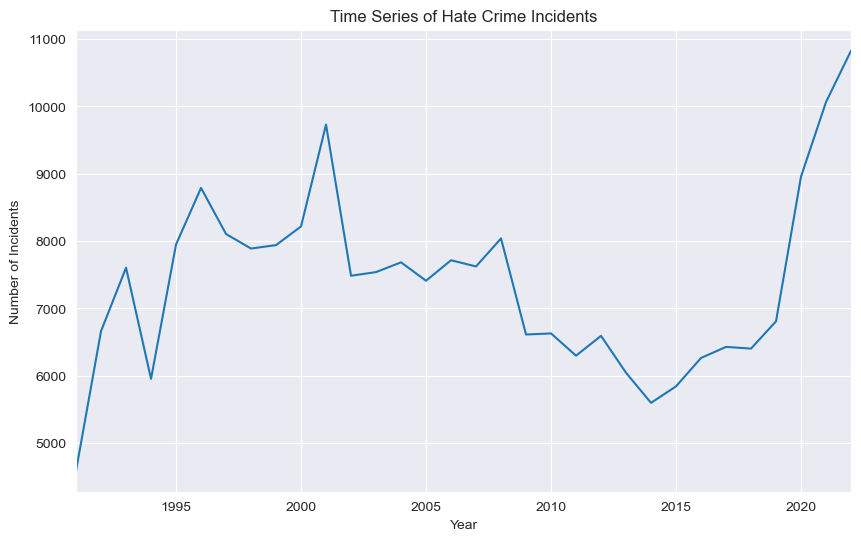

In [28]:
time = data

# Assuming 'time' is your DataFrame with hate crime incident data
# Convert 'incident_date' column to datetime format
time['incident_date'] = pd.to_datetime(time['incident_date'])

# Set 'incident_date' as the index of the DataFrame
time.set_index('incident_date', inplace=True)

#Sort 'incident date' in ascending order
time.sort_values(by='incident_date', inplace=True)

# Resample the data by year or month and count the number of incidents
# You can choose 'Y' for year or 'M' for month
incident_counts = data.resample('Y').size()  # Change 'Y' to 'M' for monthly counts

# Plot the time series graph
plt.figure(figsize=(10, 6))
incident_counts.plot()
plt.title('Time Series of Hate Crime Incidents')
plt.xlabel('Year')  # Change to 'Month' for monthly counts
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Logistic Regression

- Target Variable: 
  1. bias_desc

- Predictors:
  1. region_name
  2. total_offender_count
  3. offender_race
  4. victim_count
  5. offense_name
  6. location_name

In [29]:
X = data[["region_name", "total_offender_count", "offender_race", "victim_count", "offense_name", "location_name"]]
X

,region_name,total_offender_count,offender_race,victim_count,offense_name,location_name
incident_date,,,,,,
1991-01-01,Midwest,1,White,2,Aggravated Assault,Residence/Home
1991-01-01,Northeast,4,White,1,Simple Assault,Other/Unknown
1991-01-01,South,0,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk
1991-01-01,Northeast,0,White,1,Aggravated Assault,Other/Unknown
1991-01-01,South,7,Black or African American,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk
...,...,...,...,...,...,...
2022-12-31,South,1,Black or African American,1,Simple Assault,Residence/Home
2022-12-31,West,1,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility
2022-12-31,West,1,White,2,Simple Assault,Air/Bus/Train Terminal


In [30]:
# convert the 'total_offender_count' column to integer and all other columns to string
X = X.astype(str)
X['total_offender_count'] = X['total_offender_count'].astype(int)
X['victim_count'] = X['victim_count'].astype(int)

## Reclassifying total_offender_count

- Few: 1-5
- Several: 6 - 15
- Many: 16+

In [31]:
def classify_data(number):
    if number >= 0 and number <= 5:
        return "Few"
    elif number >= 6 and number <= 15:
        return "Several"
    elif number >= 16:
        return "Many"
    else:
        return "Invalid input"

# Apply the classification function to each row in the 'total_offender_count' column
X['grouped_total_offender_count'] = X['total_offender_count'].apply(classify_data)

In [32]:
X = X.drop("total_offender_count", axis = 1)
X

,region_name,offender_race,victim_count,offense_name,location_name,grouped_total_offender_count
incident_date,,,,,,
1991-01-01,Midwest,White,2,Aggravated Assault,Residence/Home,Few
1991-01-01,Northeast,White,1,Simple Assault,Other/Unknown,Few
1991-01-01,South,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,Few
1991-01-01,Northeast,White,1,Aggravated Assault,Other/Unknown,Few
1991-01-01,South,Black or African American,2,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Several
...,...,...,...,...,...,...
2022-12-31,South,Black or African American,1,Simple Assault,Residence/Home,Few
2022-12-31,West,Black or African American,1,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Few
2022-12-31,West,White,2,Simple Assault,Air/Bus/Train Terminal,Few


## offender_race

In [33]:
X['offender_race'].value_counts()

offender_race
White                                        94377
Unknown                                      92332
Black or African American                    31812
Not Specified                                 9518
Multiple                                      4934
Asian                                         1809
American Indian or Alaska Native              1383
Native Hawaiian or Other Pacific Islander      124
Name: count, dtype: int64

In [34]:
X = X[(X['offender_race'] != 'Unknown') & (X['offender_race'] != 'Not Specified')]
X['offender_race'].value_counts()

offender_race
White                                        94377
Black or African American                    31812
Multiple                                      4934
Asian                                         1809
American Indian or Alaska Native              1383
Native Hawaiian or Other Pacific Islander      124
Name: count, dtype: int64

## victim_count

- Few: 1-5
- Several: 6 - 15
- Many: 16+

In [35]:
X['victim_count'].value_counts()

victim_count
1      109633
2       17796
3        4097
4        1563
5         586
6         335
7         110
8          99
9          54
10         43
12         18
11         17
13         11
14         11
15          8
20          8
16          5
25          4
19          4
22          4
18          4
17          3
23          2
50          2
29          2
27          2
24          2
47          1
21          1
100         1
80          1
46          1
45          1
90          1
30          1
28          1
48          1
31          1
58          1
40          1
52          1
26          1
900         1
Name: count, dtype: int64

In [36]:
X['grouped_victim_count'] = X['victim_count'].apply(classify_data)

C:\Users\Shane\AppData\Local\Temp\ipykernel_12296\3149352847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['grouped_victim_count'] = X['victim_count'].apply(classify_data)


In [37]:
X = X.drop("victim_count", axis = 1)
X

,region_name,offender_race,offense_name,location_name,grouped_total_offender_count,grouped_victim_count
incident_date,,,,,,
1991-01-01,Midwest,White,Aggravated Assault,Residence/Home,Few,Few
1991-01-01,Northeast,White,Simple Assault,Other/Unknown,Few,Few
1991-01-01,Northeast,White,Aggravated Assault,Other/Unknown,Few,Few
1991-01-01,South,Black or African American,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Several,Few
1991-01-01,Northeast,Black or African American,Aggravated Assault,Other/Unknown,Few,Few
...,...,...,...,...,...,...
2022-12-31,South,Black or African American,Simple Assault,Residence/Home,Few,Few
2022-12-31,West,Black or African American,Simple Assault,Jail/Prison/Penitentiary/Corrections Facility,Few,Few
2022-12-31,West,White,Simple Assault,Air/Bus/Train Terminal,Few,Few


## offense_name Reclassification

1. Assault and Battery
2. Property Crimes
3. Drug-Related Offenses
4. Weapons Violations
5. Sex Offenses
6. Kidnapping and Abduction
7. Fraud and Financial Crimes
8. Miscellaneous Crimes

In [38]:
X['offense_name'].value_counts()

offense_name
Intimidation                                                                                       43907
Simple Assault                                                                                     40299
Aggravated Assault                                                                                 22458
Destruction/Damage/Vandalism of Property                                                           11901
Robbery                                                                                             3296
                                                                                                   ...  
Arson;Burglary/Breaking & Entering;Destruction/Damage/Vandalism of Property;Theft From Building        1
Destruction/Damage/Vandalism of Property;Stolen Property Offenses                                      1
Aggravated Assault;Drug Equipment Violations;Weapon Law Violations                                     1
Aggravated Assault;Burglary/Breaking & Ent

In [39]:
offense_name = pd.DataFrame(X['offense_name'].unique(), columns=['offense_name'])
offense_name

,offense_name
0,Aggravated Assault
1,Simple Assault
2,Intimidation
3,Destruction/Damage/Vandalism of Property
4,Intimidation;Robbery
...,...
336,Aggravated Assault;Arson;Destruction/Damage/Va...
337,Rape;Sexual Assault With An Object
338,Intimidation;Stolen Property Offenses
339,All Other Larceny;Stolen Property Offenses


In [40]:
# Function that converts a column of categories to a list of categories
def convert_categories(column):
    new_column = column.lower()
    new_column = column.str.replace(';', ',').replace("&", "").str.split(',')
    return new_column

# Convert the 'offense_name' column into a list of categories and store it in a new column in X
offense_name['cleaned_offense_name'] = convert_categories(offense_name['offense_name'])

AttributeError: 'Series' object has no attribute 'lower'

In [47]:
offense_name

,offense_name,cleaned_offense_name
0,Aggravated Assault,[Aggravated Assault]
1,Simple Assault,[Simple Assault]
2,Intimidation,[Intimidation]
3,Destruction/Damage/Vandalism of Property,[Destruction/Damage/Vandalism of Property]
4,Intimidation;Robbery,"[Intimidation, Robbery]"
...,...,...
336,Aggravated Assault;Arson;Destruction/Damage/Va...,"[Aggravated Assault, Arson, Destruction/Damage..."
337,Rape;Sexual Assault With An Object,"[Rape, Sexual Assault With An Object]"
338,Intimidation;Stolen Property Offenses,"[Intimidation, Stolen Property Offenses]"
339,All Other Larceny;Stolen Property Offenses,"[All Other Larceny, Stolen Property Offenses]"


In [51]:
# output the unique values in the 'offense_name' column
offense_name['cleaned_offense_name'] = pd.DataFrame(offense_name['cleaned_offense_name'].explode().unique(), columns=['cleaned_offense_name'])

In [52]:
offense_name

,offense_name,cleaned_offense_name
0,Aggravated Assault,Aggravated Assault
1,Simple Assault,Simple Assault
2,Intimidation,Intimidation
3,Destruction/Damage/Vandalism of Property,Destruction/Damage/Vandalism of Property
4,Intimidation;Robbery,Robbery
...,...,...
336,Aggravated Assault;Arson;Destruction/Damage/Va...,NaN
337,Rape;Sexual Assault With An Object,NaN
338,Intimidation;Stolen Property Offenses,NaN
339,All Other Larceny;Stolen Property Offenses,NaN


In [55]:
# Unique Offenses
offense_name["cleaned_offense_name"].unique()

array(['Aggravated Assault', 'Simple Assault', 'Intimidation',
       'Destruction/Damage/Vandalism of Property', 'Robbery',
       'Burglary/Breaking & Entering', 'Rape', 'Not Specified',
       'Murder and Nonnegligent Manslaughter', 'Arson',
       'Motor Vehicle Theft', 'All Other Larceny', 'Shoplifting',
       'Kidnapping/Abduction', 'Weapon Law Violations',
       'Drug/Narcotic Violations', 'Fondling', 'Theft From Motor Vehicle',
       'Counterfeiting/Forgery',
       'Theft of Motor Vehicle Parts or Accessories',
       'Pornography/Obscene Material', 'Sodomy',
       'Credit Card/Automated Teller Machine Fraud',
       'Theft From Building', 'Purse-snatching',
       'Drug Equipment Violations', 'Embezzlement', 'Welfare Fraud',
       'Stolen Property Offenses',
       'False Pretenses/Swindle/Confidence Game', 'Pocket-picking',
       'Sexual Assault With An Object', 'Incest', 'Extortion/Blackmail',
       'Impersonation', 'Theft From Coin-Operated Machine or Device',
     

In [60]:
crime_categories = {
    'Violent Crimes': ['Aggravated Assault', 'Simple Assault', 'Intimidation', 'Murder and Nonnegligent Manslaughter', 'Kidnapping/Abduction', 'Rape', 'Robbery', 'Burglary/Breaking & Entering', 'Motor Vehicle Theft', 'Weapon Law Violations', 'Fondling', 'Sodomy', 'Statutory Rape', 'Sexual Assault With An Object', 'Negligent Manslaughter', 'Assault with An Object'],
    
    'Sexual Crimes': ['Rape', 'Fondling', 'Sodomy', 'Sexual Assault With An Object', 'Statutory Rape', 'Prostitution', 'Pornography/Obscene Material', 'Commercial Sex Acts', 'Assisting or Promoting Prostitution', 'Purchasing Prostitution'],
    
    'Property Crimes': ['Destruction/Damage/Vandalism of Property', 'Arson', 'Theft From Motor Vehicle', 'All Other Larceny', 'Shoplifting', 'Theft From Building', 'Purse-snatching', 'Theft of Motor Vehicle Parts or Accessories', 'Theft From Coin-Operated Machine or Device', 'Pocket-picking'],
    
    'Drug Crimes': ['Drug/Narcotic Violations', 'Drug Equipment Violations'],
    
    'Financial Crimes': ['Counterfeiting/Forgery', 'Embezzlement', 'Welfare Fraud', 'Stolen Property Offenses', 'False Pretenses/Swindle/Confidence Game', 'Credit Card/Automated Teller Machine Fraud', 'Identity Theft', 'Bribery', 'Wire Fraud', 'Operating/Promoting/Assisting Gambling', 'Extortion/Blackmail', 'Betting/Wagering'],
    
    'Miscellaneous Crimes': ['Not Specified', 'Animal Cruelty', 'Hacking/Computer Invasion', 'Impersonation', 'Involuntary Servitude']
}

In [61]:
len(crime_categories)

6

## location_name Reclassification

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236289 entries, 1991-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   region_name                   236289 non-null  object
 1   offender_race                 236289 non-null  object
 2   offense_name                  236289 non-null  object
 3   location_name                 236289 non-null  object
 4   grouped_total_offender_count  236289 non-null  object
 5   grouped_victim_count          236289 non-null  object
dtypes: object(6)
memory usage: 12.6+ MB


## Classifier

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
model = LogisticRegression(multi_class= "multinomial", solver='lbfgs', max_iter=1000)